In [1]:
#Libraries for classifiers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support,roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, make_scorer, recall_score
from sklearn import metrics

In [2]:
#importing necessary libraries into our code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff



# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict


# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform


#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [4]:
import pandas as pd
DataPath = ('diabetes.csv')
data = pd.read_csv(DataPath)
print(data.head())
data.shape

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


(768, 9)

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Loading our dataset
DataPath = 'diabetes.csv'
data = pd.read_csv(DataPath)

# Displaying the first few rows of the dataset
print(data.head())

# Displaying the shape of the dataset
print(data.shape)

# Defining target and categorical columns
target_col = ["presence"]
cat_cols = data.nunique()[data.nunique() < 3].keys().tolist()
print(cat_cols)
cat_cols = [x for x in cat_cols]
print(cat_cols)

# Defining numerical columns
num_cols = [x for x in data.columns if x not in cat_cols + target_col]
print(num_cols)

# Binary columns with 2 values
bin_cols = data.nunique()[data.nunique() == 2].keys().tolist()
print(bin_cols)

# Columns with more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)

# Label encoding binary columns
le = LabelEncoder()
for i in bin_cols:
    data[i] = le.fit_transform(data[i])
    
# Duplicating columns for multi-value columns
data = pd.get_dummies(data=data, columns=multi_cols)
print(data)

# Scaling numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# Dropping original values and merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns=num_cols, axis=1)
data = data.merge(scaled, left_index=True, right_index=True, how="left")

print(data)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
(768, 9)
['Outcome']
['Outcome']
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
['Outcome']
[]
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  3

In [6]:
import numpy as np
import random
from datetime import datetime

In [7]:
data.head(20)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,0,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,0,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,1,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,0,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,1,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [8]:
import pandas as pd
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier


In [9]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [10]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [11]:
import random
import math # cos() for Rastrigin
import copy # array-copying convenience
import sys	 # max float

In [12]:
def median_target(var):   
    temp = data[data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [13]:
target_col = ["Outcome"]
cat_cols   = data.nunique()[data.nunique() < 12].keys().tolist()
cat_cols   = [x for x in cat_cols ]
#numerical columns
num_cols   = [x for x in data.columns if x not in cat_cols + target_col]
#Binary columns with 2 values
bin_cols   = data.nunique()[data.nunique() == 2].keys().tolist()

#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    data[i] = le.fit_transform(data[i])
    
#Duplicating columns for multi value columns
data = pd.get_dummies(data = data,columns = multi_cols )

#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(data[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

#dropping original values merging scaled values for numerical columns
df_data_og = data.copy()
data = data.drop(columns = num_cols,axis = 1)
data = data.merge(scaled,left_index=True,right_index=True,how = "left")

In [14]:
df = data.copy()

In [15]:
df.head(50)

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,0,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,0,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,1,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
5,0,0.342981,-0.153185,0.253036,-1.288212,-0.692891,-0.811341,-0.818079,-0.275760
6,1,-0.250952,-1.342476,-0.987710,0.719086,0.071204,-0.125977,-0.676133,-0.616111
7,0,1.827813,-0.184482,-3.572597,-1.288212,-0.692891,0.419775,-1.020427,-0.360847
8,1,-0.547919,2.381884,0.046245,1.534551,4.021922,-0.189437,-0.947944,1.681259
9,1,1.233880,0.128489,1.390387,-1.288212,-0.692891,-4.060474,-0.724455,1.766346


In [16]:
y = data['Outcome'].values
X = data.drop('Outcome',axis=1).values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Iteration 20:
Worst Lemur Accuracy: 0.8013698630136986
Worst Lemur Diversity (Hamming Distance): 0.398972602739726
Worst Lemur Fitness: 0.6909668834189011

Iteration 40:
Worst Lemur Accuracy: 0.8303571428571429
Worst Lemur Diversity (Hamming Distance): 0.296875
Worst Lemur Fitness: 0.702635115434799

Iteration 60:
Worst Lemur Accuracy: 0.8348214285714286
Worst Lemur Diversity (Hamming Distance): 0.421875
Worst Lemur Fitness: 0.7298672582919417

Iteration 80:
Worst Lemur Accuracy: 0.8470588235294118
Worst Lemur Diversity (Hamming Distance): 0.32745098039215687
Worst Lemur Fitness: 0.7207312091503267

Iteration 100:
Worst Lemur Accuracy: 0.852017937219731
Worst Lemur Diversity (Hamming Distance): 0.3251121076233184
Worst Lemur Fitness: 0.7238355552788478



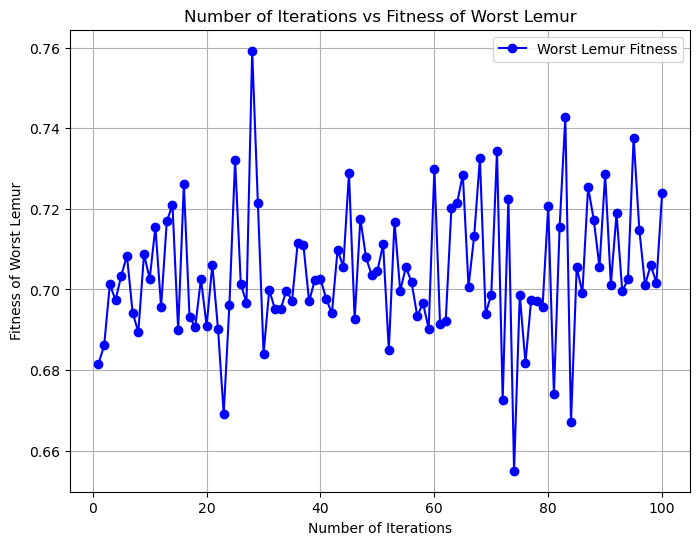

In [19]:
#Diversity measure of Hamming distance (worstbag 5)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

Iteration 20:
Worst Lemur Accuracy: 0.8326745718050066
Worst Lemur Diversity (Hamming Distance): 0.28326745718050067
Worst Lemur Fitness: 0.7030868601176131

Iteration 40:
Worst Lemur Accuracy: 0.8241308793456033
Worst Lemur Diversity (Hamming Distance): 0.2903885480572597
Worst Lemur Fitness: 0.7002392320632632

Iteration 60:
Worst Lemur Accuracy: 0.8133971291866029
Worst Lemur Diversity (Hamming Distance): 0.35645933014354064
Worst Lemur Fitness: 0.7080865134010192

Iteration 80:
Worst Lemur Accuracy: 0.8245614035087719
Worst Lemur Diversity (Hamming Distance): 0.4087719298245614
Worst Lemur Fitness: 0.7171109967023446

Iteration 100:
Worst Lemur Accuracy: 0.8287671232876712
Worst Lemur Diversity (Hamming Distance): 0.3926940639269406
Worst Lemur Fitness: 0.7241549559837949



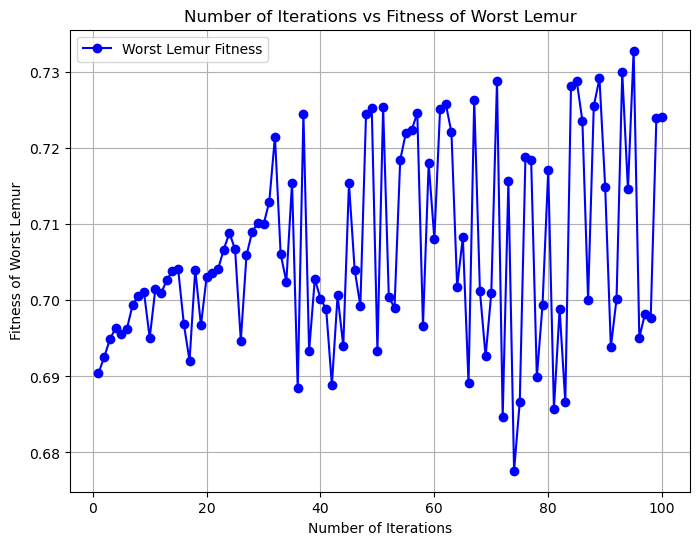

In [18]:
#Diversity measure of Hamming distance (worstbag 10)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=10):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

Iteration 20:
Worst Lemur Accuracy: 0.8210361067503925
Worst Lemur Diversity (Hamming Distance): 0.3814756671899529
Worst Lemur Fitness: 0.725424420780458

Iteration 40:
Worst Lemur Accuracy: 0.825
Worst Lemur Diversity (Hamming Distance): 0.29545454545454547
Worst Lemur Fitness: 0.7106884057971015

Iteration 60:
Worst Lemur Accuracy: 0.8262548262548263
Worst Lemur Diversity (Hamming Distance): 0.41312741312741313
Worst Lemur Fitness: 0.7461081399741195

Iteration 80:
Worst Lemur Accuracy: 0.8099547511312217
Worst Lemur Diversity (Hamming Distance): 0.37104072398190047
Worst Lemur Fitness: 0.7182830170681833

Iteration 100:
Worst Lemur Accuracy: 0.8733031674208145
Worst Lemur Diversity (Hamming Distance): 0.332579185520362
Worst Lemur Fitness: 0.7422649175206719



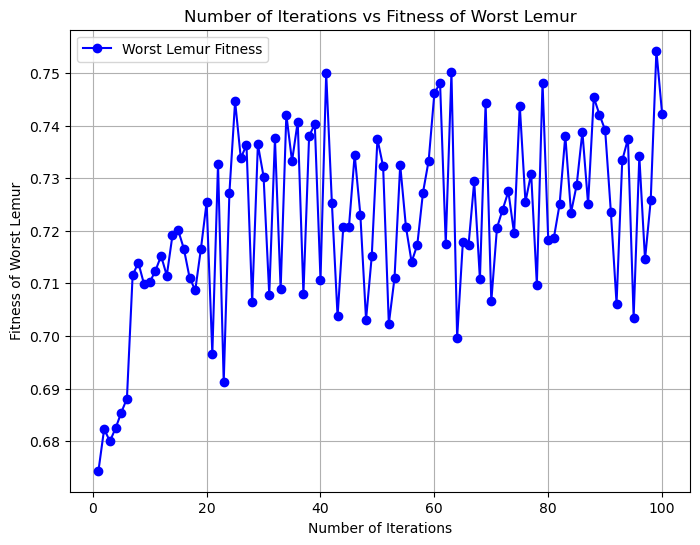

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.9415584415584416
AUC: 0.9303030303030303
Sensitivity (Recall): 0.8909090909090909
Specificity: 0.9696969696969697
Precision: 0.9423076923076923
F1 Score: 0.9158878504672897
G-measure: 0.9294685824330091
G-measure: 0.9294685824330091


In [19]:
#BEST BAG HAMMING 10 BAGS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 10
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
print("G-measure:", g_measure)



Iteration 20:
Worst Lemur Accuracy: 0.8265993265993266
Worst Lemur Diversity (Hamming Distance): 0.3484848484848485
Worst Lemur Fitness: 0.703549098652945

Iteration 40:
Worst Lemur Accuracy: 0.8128571428571428
Worst Lemur Diversity (Hamming Distance): 0.3157142857142857
Worst Lemur Fitness: 0.7023598078870195

Iteration 60:
Worst Lemur Accuracy: 0.8187221396731055
Worst Lemur Diversity (Hamming Distance): 0.3164933135215453
Worst Lemur Fitness: 0.7125026584752806

Iteration 80:
Worst Lemur Accuracy: 0.849445324881141
Worst Lemur Diversity (Hamming Distance): 0.31061806656101426
Worst Lemur Fitness: 0.7266892016871921

Iteration 100:
Worst Lemur Accuracy: 0.8075601374570447
Worst Lemur Diversity (Hamming Distance): 0.36082474226804123
Worst Lemur Fitness: 0.7157879431165494



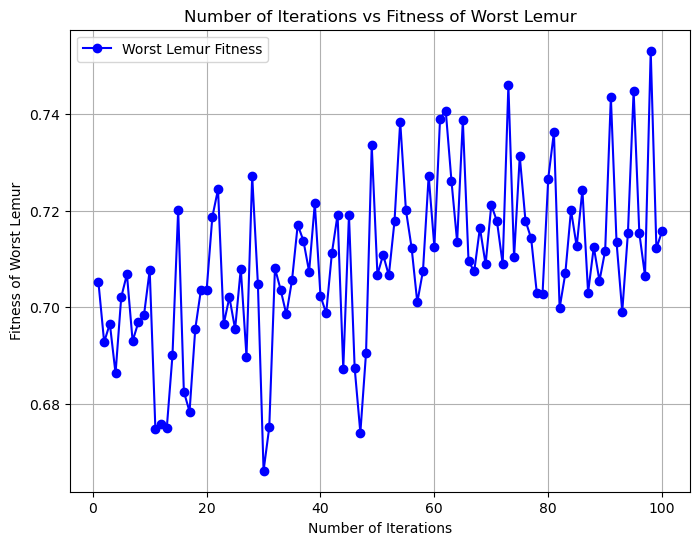

Evaluation Metrics for Ensemble Predictions:
Accuracy: 0.8311688311688312
AUC: 0.7959595959595961
Sensitivity (Recall): 0.6727272727272727
Specificity: 0.9191919191919192
Precision: 0.8222222222222222
F1 Score: 0.7400000000000001
G-measure: 0.786362176678741
G-measure: 0.786362176678741


In [20]:
#BEST BAG HAMMING 5 BAGS 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Combine X and y into a single dataset
data = np.c_[X, y]

# Set the number of lemurs and the desired bag size range
num_lemurs = 5
min_bag_size = len(data) // 2
max_bag_size = len(data)

# Define the classifiers and their corresponding hyperparameter grids
classifiers = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'param_grid': {'n_neighbors': [3, 5, 7]}
    },
    'DT': {
        'model': DecisionTreeClassifier(),
        'param_grid': {'max_depth': [None, 5, 10]}
    },
    'SVM': {
        'model': SVC(probability=True),
        'param_grid': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    }
}

# Define the fitness function
def fitness_function(accuracy, diversity, precision, recall, f1):
    return (0.5 * accuracy + 
            0.2 * diversity + 
            0.1 * precision + 
            0.1 * recall + 
            0.1 * f1)

# Define the Lemur Algorithm
def lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations=100):
    # Initialize the lemurs randomly
    lemurs = [np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False) for _ in range(num_lemurs)]

    # Tracking lists for worst lemur metrics and fitness
    worst_lemur_accuracies = []
    worst_lemur_diversities = []
    worst_lemur_fitnesses = []

    # Perform Lemur Algorithm optimization
    for iteration in range(num_iterations):
        accuracies = []
        diversities = []

        # Train and evaluate each lemur using 5-fold cross-validation
        for lemur in lemurs:
            X_train_lemur, y_train_lemur = data[lemur, :-1], data[lemur, -1]

            ensemble_preds = np.empty((len(X_train_lemur), len(classifiers)))

            # Train and predict with each classifier using 5-fold cross-validation
            for idx, (name, clf) in enumerate(classifiers.items()):
                model = GridSearchCV(clf['model'], clf['param_grid'], cv=KFold(n_splits=5, shuffle=True, random_state=42))
                model.fit(X_train_lemur, y_train_lemur)
                preds = model.predict(X_train_lemur)
                ensemble_preds[:, idx] = preds

            # Calculate diversity as Hamming distance between classifiers' predictions
            diversity = np.sum(ensemble_preds[:, 1:] != ensemble_preds[:, :-1]) / ensemble_preds.shape[0]

            # Calculate accuracy
            ensemble_preds_majority = np.apply_along_axis(lambda x: np.argmax(np.bincount(np.round(x).astype(int))), axis=1, arr=ensemble_preds)
            accuracy = accuracy_score(y_train_lemur, ensemble_preds_majority)

            accuracies.append(accuracy)
            diversities.append(diversity)

        # Calculate fitness for each lemur
        fitness = [fitness_function(accuracy, diversity, 
                                    precision_score(y_train_lemur, ensemble_preds_majority), 
                                    recall_score(y_train_lemur, ensemble_preds_majority), 
                                    f1_score(y_train_lemur, ensemble_preds_majority)) 
                   for accuracy, diversity in zip(accuracies, diversities)]

        # Identify the lemur with the worst performance
        worst_lemur_index = np.argmin(fitness)
        worst_lemur_accuracy = accuracies[worst_lemur_index]
        worst_lemur_diversity = diversities[worst_lemur_index]

        # Append worst lemur metrics and fitness to tracking lists
        worst_lemur_accuracies.append(worst_lemur_accuracy)
        worst_lemur_diversities.append(worst_lemur_diversity)
        worst_lemur_fitnesses.append(fitness[worst_lemur_index])

        # Movement of lemurs
        for i in range(num_lemurs):
            for j in range(num_lemurs):
                if fitness[i] < fitness[j] and len(lemurs[i]) == len(lemurs[j]):
                    r = np.linalg.norm(data[lemurs[i], :-1]- data[lemurs[j], :-1], axis=1).sum()
                    step_size = np.exp(-r)  # Step size based on distance
                    new_lemur = lemurs[i] + step_size * (lemurs[j] - lemurs[i])
                    new_lemur = new_lemur.astype(int)  # Ensure indices remain integers
                    lemurs[i] = new_lemur

        # Replace the worst lemur with a new lemur randomly sampled from the dataset
        new_lemur = np.random.choice(len(data), np.random.randint(min_bag_size, max_bag_size), replace=False)
        lemurs[worst_lemur_index] = new_lemur

        # Print values every 20 iterations
        if (iteration + 1) % 20 == 0:
            print(f"Iteration {iteration + 1}:")
            print(f"Worst Lemur Accuracy: {worst_lemur_accuracy}")
            print(f"Worst Lemur Diversity (Hamming Distance): {worst_lemur_diversity}")
            print(f"Worst Lemur Fitness: {fitness[worst_lemur_index]}")
            print()

    # Return the optimized lemurs and tracking lists
    return lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses

# Define number of iterations globally
num_iterations = 100

# Perform Lemur Algorithm optimization to get the optimal lemurs and tracking lists
optimal_lemurs, worst_lemur_accuracies, worst_lemur_diversities, worst_lemur_fitnesses = lemur_algorithm(data, classifiers, num_lemurs, min_bag_size, max_bag_size, num_iterations)

# Line plot for number of iterations vs fitness of worst lemur
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_iterations + 1), worst_lemur_fitnesses, marker='o', color='b', label='Worst Lemur Fitness')
plt.xlabel('Number of Iterations')
plt.ylabel('Fitness of Worst Lemur')
plt.title('Number of Iterations vs Fitness of Worst Lemur')
plt.legend()
plt.grid(True)
plt.show()

# Use the optimized ensemble to make predictions on the testing data
ensemble_preds = np.empty((len(X_test), len(classifiers)))

for idx, (name, clf) in enumerate(classifiers.items()):
    # Get the classifier and its corresponding optimal lemur
    classifier = clf['model']
    optimal_lemur = optimal_lemurs[idx]
    
    # Train the classifier on the optimal lemur (training data)
    classifier.fit(X[optimal_lemur], y[optimal_lemur])
    
    # Make predictions on the testing data using the trained classifier
    probs = classifier.predict_proba(X_test)
    
    # Store the probabilities of the positive class (1) in the ensemble_preds array
    ensemble_preds[:, idx] = probs[:, 1]

# Majority voting for ensemble predictions
ensemble_preds_majority = np.mean(ensemble_preds, axis=1)  # Calculate mean class probabilities
threshold = 0.5
ensemble_preds_majority = (ensemble_preds_majority >= threshold).astype(int)  # Convert probabilities to binary class labels

# Calculate evaluation metrics for the ensemble predictions
accuracy = accuracy_score(y_test, ensemble_preds_majority)
auc = roc_auc_score(y_test, ensemble_preds_majority)
sensitivity = recall_score(y_test, ensemble_preds_majority)
specificity = recall_score(y_test, ensemble_preds_majority, pos_label=0)  # Calculate recall for negative class (0)
precision = precision_score(y_test, ensemble_preds_majority)
f1_measure = f1_score(y_test, ensemble_preds_majority)

# Calculate G-measure
g_measure = np.sqrt(sensitivity * specificity)

# Print evaluation metrics for the ensemble predictions
print("Evaluation Metrics for Ensemble Predictions:")
print("Accuracy:", accuracy)
print("AUC:", auc)
print("Sensitivity (Recall):", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("F1 Score:", f1_measure)
print("G-measure:", g_measure)
print("G-measure:", g_measure)

